In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mibitrans.data.parameters import AttenuationParameters
from mibitrans.data.parameters import HydrologicalParameters
from mibitrans.data.parameters import ModelParameters
from mibitrans.data.parameters import SourceParameters
from mibitrans.transport import domenico as dom
from mibitrans.transport import karanovic as kar
from mibitrans.visualize.plot_line import centerline

In [2]:
ft = 3.281 # factor to convert ft to m

This example compares the Domenico (1987) analytical solution as implemented in the original BIOSCREEN with the exact solution described in Karanovic et al. (2007), implemented in BIOSCREEN-AT. The solution from Karanovic is adapted as follows:

\begin{equation}
C(x,y,z,t)  \sum_{i=1}^{n}\left(C^*_{0,i}\frac{x}{8\sqrt{\pi D^{'}_{x}}}\exp(-\gamma t)
\cdot \int_{0}^{t}\left[\frac{1}{\tau^{\frac{3}{2}}} \exp\left((\gamma - \lambda_{EFF})\tau - \frac{(x-v^{'}\tau)^2}{4D^{'}_{x}\tau}\right)
\cdot \left\{ERFC\left(\frac{y-Y_i}{2 \sqrt{D^{'}_{y}\tau}}\right)-ERFC\left(\frac{y+Y_i}{2 \sqrt{D^{'}_{y}\tau}}\right) \right\}
\cdot \left\{ERFC\left(\frac{z-Z}{2 \sqrt{D^{'}_{z}\tau}}\right)-ERFC\left(\frac{z+Z}{2 \sqrt{D^{'}_{z}\tau}}\right) \right\}\right] d\tau \right)
\end{equation}

Which allows for source superposition and therefore multiple source zones. For instant reaction, BC is added to the outer source zone and subtracted from the resulting concentrations. Where (C(x,y,z,t) < 0) = 0

## Input parameters
Input parameters are the default parameters when opening up BIOSCREEN-AT. All imperial units are converted to consistent metric units.


In [3]:
hydro = HydrologicalParameters(
    # Groundwater flow velocity, in [m/day]
    velocity=335.2 / ft / 365,
    # Effective soil porosity [-]
    porosity=0.25,
    # Longitudinal dispersivity, in [m]
    alpha_x=28.887 / ft,
    # Transverse horizontal dispersivity, in [m]
    alpha_y=2.889 / ft,
    # Transverse vertical dispersivity, in [m]
    alpha_z=0.289 / ft,
)

# Parameters for retardation and degradation
att = AttenuationParameters(
    # Contaminant retardation factor [-]
    retardation=1.20672,
    # Contaminant half life, in [days]
    half_life=0,
    # Difference between background oxygen and current oxygen concentration in groundwater, in [g/m^3]
    delta_oxygen=5.78,
    # Difference between background nitrate and current nitrate concentration in groundwater, in [g/m^3]
    delta_nitrate=17,
    # Current ferrous iron concentration in groundwater, in [g/m^3]
    ferrous_iron=11.3,
    # Difference between background sulfate and current sulfate concentration in groundwater, in [g/m^3]
    delta_sulfate=100,
    # Current methane concentration in groundwater, in [g/m^3]
    methane=0.414,
)

att = AttenuationParameters(
    # Contaminant retardation factor [-]
    retardation=1.20672,
    # Contaminant half life, in [days]
    half_life=0,
    # Difference between background oxygen and current oxygen concentration in groundwater, in [g/m^3]
    delta_oxygen=5.78,
    # Difference between background nitrate and current nitrate concentration in groundwater, in [g/m^3]
    delta_nitrate=17,
    # Current ferrous iron concentration in groundwater, in [g/m^3]
    ferrous_iron=11.3,
    # Difference between background sulfate and current sulfate concentration in groundwater, in [g/m^3]
    delta_sulfate=100,
    # Current methane concentration in groundwater, in [g/m^3]
    methane=0.414,
)

# Parameters for source dimensions and concentrations
source = SourceParameters(
    # Extent of source in the positive y-direction (total source extent is 2*50=100
    source_zone_boundary=np.array([50 / ft]),
    # Concentration in source zone
    source_zone_concentration=np.array([9]),
    # Source extent in z-direction
    depth=10 / ft,
    # Undissolved mass of contaminant source
    total_mass="inf",
)

model = ModelParameters(
    # Model extent in the longitudinal (x) direction in [m].
    model_length=2500 / ft,
    # Model extent in the transverse horizontal (y) direction in [m].
    model_width=500 / ft,
    # Model duration in [days].
    model_time=5 * 365,
    # Model grid discretization step size in the longitudinal (x) direction, in [m].
    dx=20 / ft,
    # Model grid discretization step size in the transverse horizontal (y) direction, in [m].
    dy=5 / ft,
    # Model time discretization step size, in [days]
    dt=365,
)

## Running model
As exact solution use integral, run time is longer than that of the Domenico solution, depending on model resolution.

In [9]:
att.half_life = 0
nodeg_kara = kar.NoDecay(
    hydrological_parameters=hydro,
    attenuation_parameters=att,
    source_parameters=source,
    model_parameters=model,
    verbose=True,
)

# Set half life to a non-0 value to simulate linear decay
att.half_life = 10 * 365

lindeg_kara = kar.LinearDecay(
    hydrological_parameters=hydro,
    attenuation_parameters=att,
    source_parameters=source,
    model_parameters=model,
    verbose=True,
)

instdeg_kara = kar.InstantReaction(
    hydrological_parameters=hydro,
    attenuation_parameters=att,
    source_parameters=source,
    model_parameters=model,
    verbose=True,
)

integrating for source zone  0
integrating for t = 365 days
integrating for t = 730 days
integrating for t = 1095 days
integrating for t = 1460 days
integrating for t = 1825 days
integrating for source zone  0
integrating for t = 365 days
integrating for t = 730 days
integrating for t = 1095 days
integrating for t = 1460 days
integrating for t = 1825 days
integrating for source zone  0
integrating for t = 365 days
integrating for t = 730 days
integrating for t = 1095 days
integrating for t = 1460 days
integrating for t = 1825 days


## Visualize

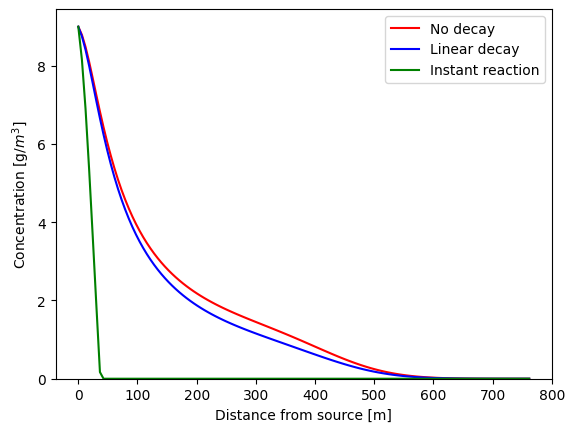

In [10]:
centerline(nodeg_kara, color="red", label="No decay")
centerline(lindeg_kara, color="blue", label="Linear decay")
centerline(instdeg_kara, color="green", label="Instant reaction")
plt.legend()
plt.show()

Running Domenico solution for comparison

In [6]:
nodeg_dom = dom.NoDecay(
    hydrological_parameters=hydro,
    attenuation_parameters=att,
    source_parameters=source,
    model_parameters=model,
    verbose=True,
)

lindeg_dom = dom.LinearDecay(
    hydrological_parameters=hydro,
    attenuation_parameters=att,
    source_parameters=source,
    model_parameters=model,
    verbose=True,
)

instdeg_dom = dom.InstantReaction(
    hydrological_parameters=hydro,
    attenuation_parameters=att,
    source_parameters=source,
    model_parameters=model,
    verbose=True,
)

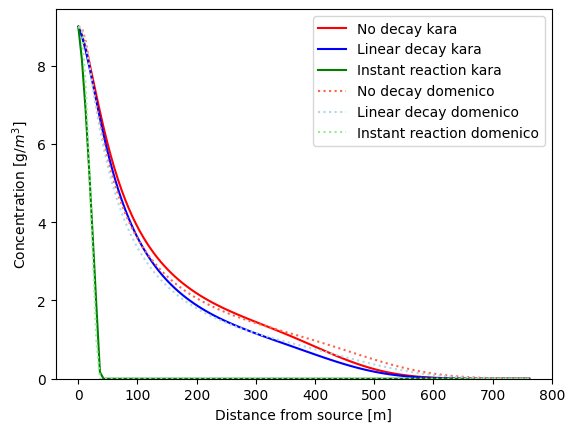

In [7]:
centerline(nodeg_kara, color="red", label="No decay kara")
centerline(lindeg_kara, color="blue", label="Linear decay kara")
centerline(instdeg_kara, color="green", label="Instant reaction kara")
centerline(nodeg_dom, color="tomato", linestyle=":", label="No decay domenico")
centerline(lindeg_dom, color="lightblue", linestyle=":", label="Linear decay domenico")
centerline(instdeg_dom, color="lightgreen", linestyle=":", label="Instant reaction domenico")
plt.legend()
plt.show()

## Comparing to BIOSCREEN-AT


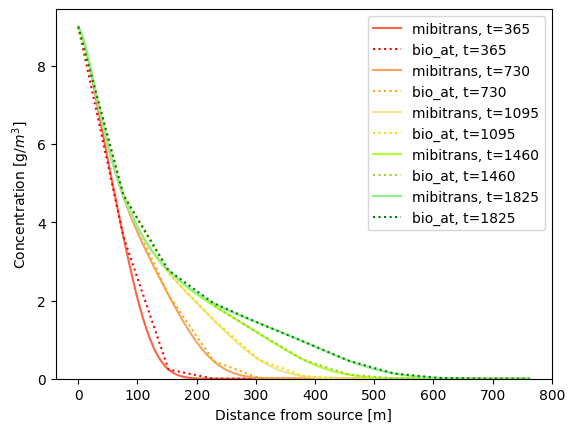

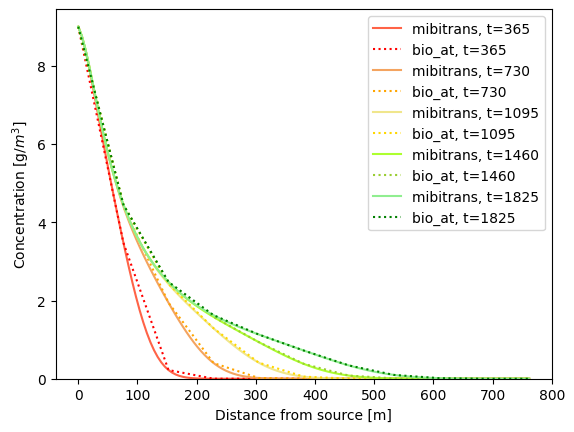

In [8]:
bio_x = [0, 250 / ft, 500 / ft, 750 / ft, 1000 / ft, 1250 / ft, 1500 / ft, 1750 / ft, 2000 / ft, 2250 / ft, 2500 / ft]
bio_at_nodecay = np.array(
    (
        [
            [9.000, 3.635, 0.236, 0.001, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
            [9.000, 4.649, 2.144, 0.452, 0.022, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
            [9.000, 4.696, 2.707, 1.505, 0.493, 0.064, 0.003, 0.000, 0.000, 0.000, 0.000],
            [9.000, 4.699, 2.767, 1.872, 1.161, 0.483, 0.104, 0.010, 0.000, 0.000, 0.000],
            [9.000, 4.699, 2.772, 1.932, 1.423, 0.947, 0.459, 0.134, 0.021, 0.002, 0.000],
        ]
    )
)

bio_at_lindecay = np.array(
    (
        [
            [9.000, 3.479, 0.222, 0.001, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
            [9.000, 4.407, 1.944, 0.401, 0.019, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
            [9.000, 4.448, 2.423, 1.289, 0.412, 0.053, 0.002, 0.000, 0.000, 0.000, 0.000],
            [9.000, 4.450, 2.471, 1.580, 0.938, 0.380, 0.081, 0.008, 0.000, 0.000, 0.000],
            [9.000, 4.450, 2.475, 1.624, 1.131, 0.721, 0.340, 0.097, 0.015, 0.001, 0.000],
        ]
    )
)
colors = ["tomato", "sandybrown", "khaki", "greenyellow", "lightgreen"]
colors_bio = ["red", "orange", "gold", "yellowgreen", "green"]
for i in range(len(nodeg_kara.t)):
    centerline(nodeg_kara, time=nodeg_kara.t[i], color=colors[i], label=f"mibitrans, t={nodeg_kara.t[i]}")
    plt.plot(bio_x, bio_at_nodecay[i, :], color=colors_bio[i], linestyle=":", label=f"bio_at, t={nodeg_kara.t[i]}")
plt.legend()
plt.show()


for i in range(len(lindeg_kara.t)):
    centerline(lindeg_kara, time=lindeg_kara.t[i], color=colors[i], label=f"mibitrans, t={lindeg_kara.t[i]}")
    plt.plot(bio_x, bio_at_lindecay[i, :], color=colors_bio[i], linestyle=":", label=f"bio_at, t={lindeg_kara.t[i]}")
plt.legend()
plt.show()

mibitrans output corresponds very well with the BIOSCREEN-AT output, and has higher resolution. Note that despite BIOSCREEN-AT taking in instant reaction parameters, it does not have the option to calculate biodegradation this way.